 
# Printing a simple line: 

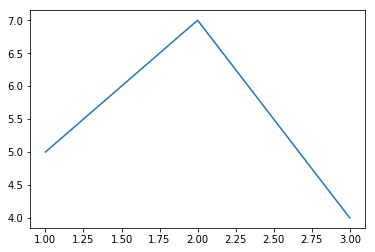

In [8]:
import matplotlib.pyplot as plt 
plt.plot([1,2,3],[5,7,4]) # Puting the value of x and y 
plt.show()

# Titles and labels


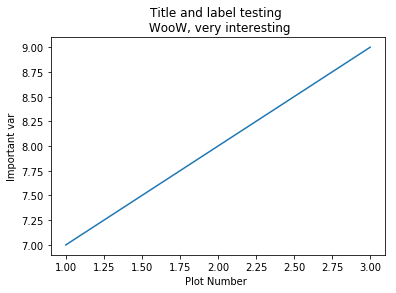

In [3]:
x = [1,2,3]
y = [7,8,9]

plt.plot(x,y)
plt.xlabel('Plot Number ')
plt.ylabel('Important var')

plt.title('Title and label testing \n WooW, very interesting')
plt.show()

# Legends


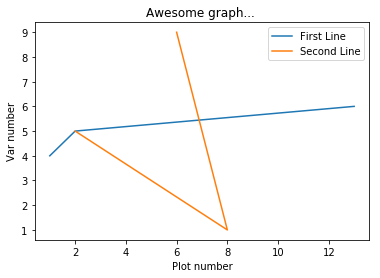

In [4]:
x1 = [1,2,13]
y1 = [4,5,6]

x2 = [6,8,2]
y2 = [9,1,5]

plt.plot(x1,y1, label= 'First Line')
plt.plot(x2,y2, label = 'Second Line')

plt.xlabel('Plot number')
plt.ylabel('Var number')

plt.title('Awesome graph... ')
plt.legend() # it shows which line is what 

plt.show()


# Bar chart

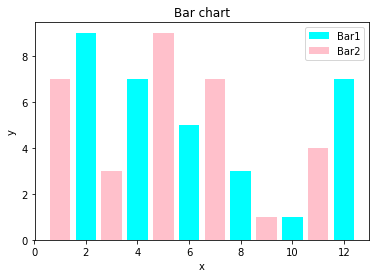

In [30]:
x1 = [2,4,6,8,10,12]
y1 = [ 9,7,5,3,1,7]

x2 = [1,3,5,7,9,11]
y2 = [7,3,9,7,1,4]

# Draw the bar graph
plt.bar(x1,y1,label = 'Bar1',color = 'cyan')
plt.bar(x2,y2,label = 'Bar2', color = 'pink' )

# put the label and title
plt.xlabel('x')
plt.ylabel('y')

plt.title('Bar chart')


plt.legend()
plt.show()

# Histogram


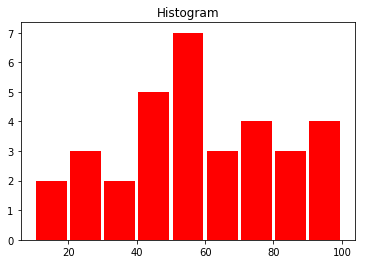

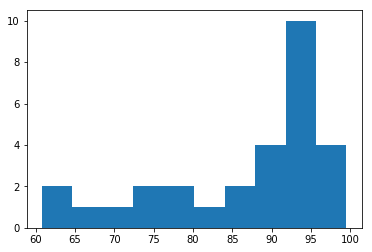

In [17]:
# Example 1 

population_ages = [56,78,34,11,56,87,43,98,42,54,55,55,21,98,65,43,23,45,56,78,90,12,45,78,54,32,67,89,21,65,87,76,97]
bins = [10,20,30,40,50,60,70,80,90,100]

plt.hist(population_ages,bins, histtype='bar',rwidth=0.9, color = 'red')

plt.title('Histogram')
plt.show()


# Example 2 

# %pylab inline

grades = array((93.5,93,60.8,94.5,82,87.5,91.5,99.5,86,93.5,92.5,78,76,69,94.5,89.5,92.8,78,65.5,98,98.5,92.3,95.5,76,91,95,61.4,96,90))
junk = hist(grades)


# Scatter Plots


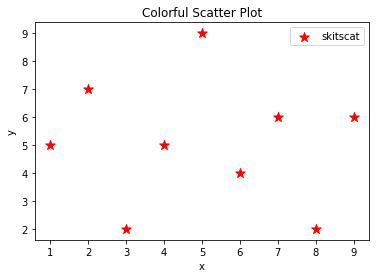

In [2]:
import matplotlib.pyplot as plt 


x = [1,2,3,4,5,6,7,8,9]
y = [5,7,2,5,9,4,6,2,6]


plt.scatter(x,y, label = 'skitscat', color = 'red', marker = '*', s = 100 ) # s is size/marker size 

plt.xlabel('x')
plt.ylabel('y')
plt.title('Colorful Scatter Plot')
plt.legend()
plt.show()


# Loading data from file

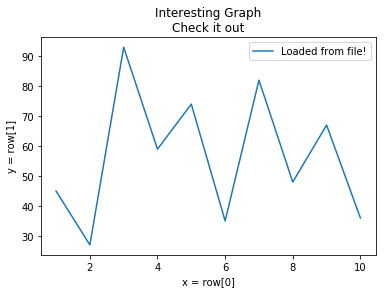

In [6]:
import matplotlib.pyplot as plt


# Way 1 - manual importing 

'''
import csv

x = []
y = []


with open('example.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter='.')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
'''


# Way 2 - using numpy

import numpy as np

x,y = np.loadtxt('example.txt',delimiter='.',unpack=True) # delimiter means separator

plt.plot(x,y, label='Loaded from file!')
plt.xlabel('x = row[0]')
plt.ylabel('y = row[1]')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

# Getting data from internet


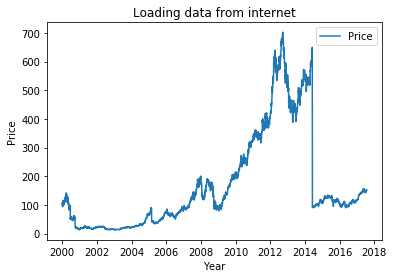

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates


"""Function for date conversion or decoding """
def bytespdate2num(fmt,encoding='utf-8'): # fmt is format, utf-8 for internet data
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s=b.decode(encoding) # decode based on encoding which is utf-8
        return strconverter(s)
    return bytesconverter
    
"""Function for getting and exracting the data"""
def graph_data(stock):

    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'

    source_code = urllib.request.urlopen(stock_price_url).read().decode()

    stock_data = []
    split_source = source_code.split('\n') # separating the data with a new line

    for line in split_source[1:]:
        split_line = line.split(',') # seperated by comma
        if len(split_line) == 7: # only consider the data which has 7 values
            stock_data.append(line)
                
    
    # Defining how the format of the data goes...
    date,openp,high,low,closep,adjusted_close,volume= np.loadtxt(stock_data,
                                                   delimiter=',',
                                                   unpack=True,
                                                   converters = {0: bytespdate2num('%Y-%m-%d')}) # converting the date

    
    plt.plot_date(date,openp,'-',label='Price')

    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title('Loading data from internet')
    plt.legend()
    plt.show()

graph_data('TSLA')    


# Basic Customization & label rotation


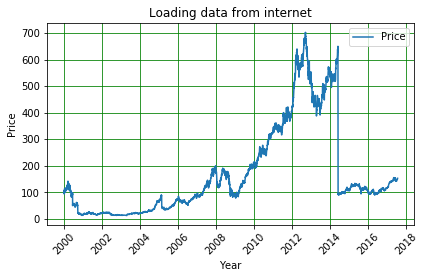

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates


"""Function for date conversion or decoding """
def bytespdate2num(fmt,encoding='utf-8'): # fmt is format, utf-8 for internet data
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s=b.decode(encoding) # decode based on encoding which is utf-8
        return strconverter(s)
    return bytesconverter
    
"""Function for getting and exracting the data"""
def graph_data(stock):

    fig = plt.figure() 
    ax1 = plt.subplot2grid((1,1),(0,0)) # (Shape of the grip, starting point )
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n') # separating the data with a new line

    for line in split_source[1:]:
        split_line = line.split(',') # seperated by comma
        if len(split_line) == 7: # only consider the data which has 7 values
            stock_data.append(line)
                
    
    # Defining how the format of the data goes...
    date,openp,high,low,closep,adjusted_close,volume= np.loadtxt(stock_data,
                                                   delimiter=',',
                                                   unpack=True,
                                                   converters = {0: bytespdate2num('%Y-%m-%d')}) # converting the date

    
    ax1.plot_date(date,openp,'-',label='Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True,color='g',linestyle='-')

    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title('Loading data from internet')
    plt.legend()
    plt.subplots_adjust(left=0.09,bottom=0.20,right=0.94,top=0.90,wspace=0.2)
    plt.show()

graph_data('TSLA')    
